In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# import matplotlib
# matplotlib.use("Qt5Agg")  # 修改配置的后端 backend
import soundfile as sf

In [18]:
#产生一个理想正交移相器的单位脉冲响应
hd=[]
N=10000
for n in np.arange(-N,N,1):
    if(n%2==0):
        hd.append(0)
    else:
        hd.append(2/(np.pi*n))
#len(hd)=2000

In [19]:
# 创建一个长度为10的汉宁窗
# hanning_window = np.hanning(200)
M=2000
# 创建一个长度为10的汉明窗
hamming_window = np.hamming(2000)
i=N/2-M/2
i=int(i)#i=2000
hd1=hd[i:N-i]#len(hd1)=2000
# 创建一个长度为10的布莱克曼窗
# blackman_window = np.blackman(200)


In [20]:
hn=[]#对正交移相器加窗
for n in range(len(hamming_window)):
    a=hamming_window[n]*hd1[n]
    hn.append(a)

In [21]:
sig=[]
f=0.0625
N=200
for n in range(N):
    a=np.sin(2*np.pi*f*n)
    sig.append(a)

In [22]:
y=np.convolve(sig,hn,mode="full")

<Figure size 640x480 with 0 Axes>

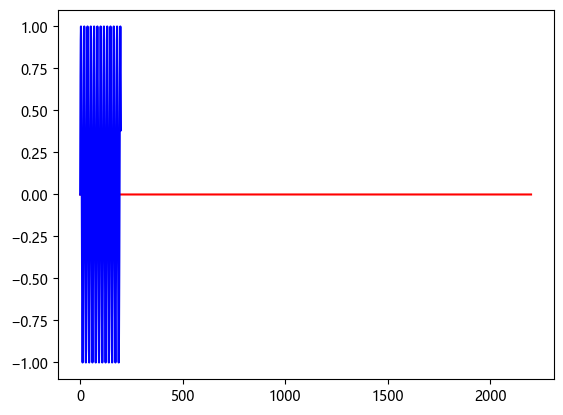

<Figure size 640x480 with 0 Axes>

In [23]:

plt.plot(np.arange(len(y)),y,'r')
plt.plot(np.arange(len(sig)),sig,'b')
plt.figure(2)



C:\Users\YFC\AppData\Local\Temp\ipykernel_18644\1836676486.py:25: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(h, use_line_collection=True)
C:\Users\YFC\anaconda3\envs\env_38\lib\site-packages\numpy\ma\core.py:3375: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
C:\Users\YFC\anaconda3\envs\env_38\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


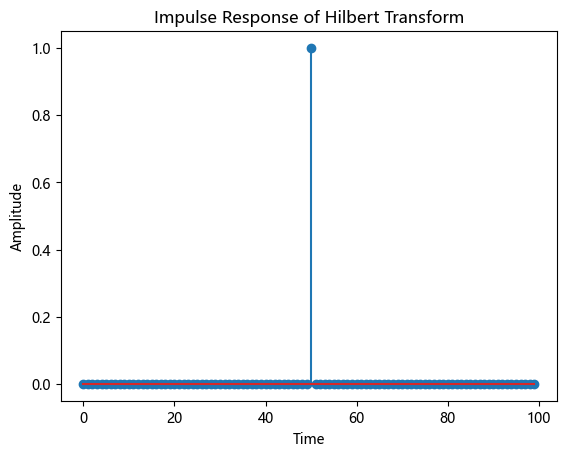

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义希尔伯特变换的函数
def hilbert_transform(x):
    N = len(x)
    X = np.fft.fft(x)
    H = np.zeros(N)
    if N % 2 == 0:
        H[0] = H[N//2] = 1
        H[1:N//2] = 2
    else:
        H[0] = 1
        H[1:(N+1)//2] = 2
    return np.fft.ifft(X * H)

# 生成冲激信号
impulse = np.zeros(100)
impulse[50] = 1

# 计算希尔伯特变换的冲激响应
h = hilbert_transform(impulse)

# 画图
plt.stem(h, use_line_collection=True)
plt.title('Impulse Response of Hilbert Transform')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


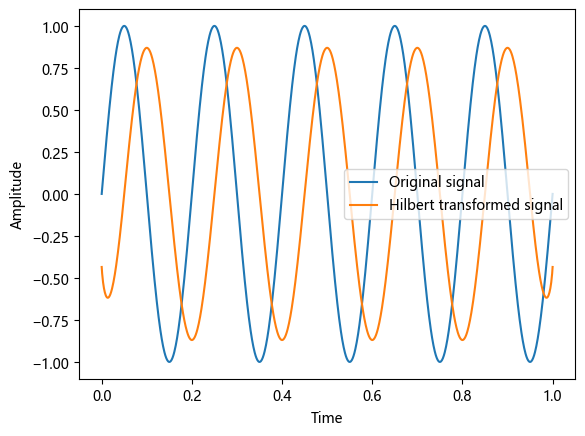

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, convolve

# 设计希尔伯特变换滤波器
def hilbert_filter(N):
    h = np.zeros(N)
    for n in range(N):
        if n != N//2:
            h[n] = 1/(np.pi*(n-N//2))
    return h

# 生成输入信号
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t)

# 应用希尔伯特变换滤波器
N = 101
h = hilbert_filter(N)
y = convolve(x, h, mode='same')

# 绘制原始信号和希尔伯特变换后的信号
plt.figure()
plt.plot(t, x, label='Original signal')
plt.plot(t, y, label='Hilbert transformed signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
